In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crop_yield.csv")

In [3]:
print(df.dtypes)

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [4]:
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'])

In [5]:
X = df.drop('Yield', axis=1)
y = df['Yield']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [9]:
model_reg = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer
])

C:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_no_reg = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Conv1D(64, kernel_size=3, activation='relu'),
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer
])

In [11]:
model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model with regularization
history_reg = model_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0090 - loss: 544773.8125 - mae: 91.0864 - val_accuracy: 0.0086 - val_loss: 82329.4062 - val_mae: 25.3702
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0082 - loss: 152665.9688 - mae: 31.3618 - val_accuracy: 0.0086 - val_loss: 37186.9023 - val_mae: 17.6865
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0072 - loss: 53071.3672 - mae: 18.2832 - val_accuracy: 0.0046 - val_loss: 26438.4785 - val_mae: 13.3639
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0083 - loss: 34973.6680 - mae: 15.3310 - val_accuracy: 0.0086 - val_loss: 109694.6641 - val_mae: 29.4084
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.0094 - loss: 82276.3047 - mae: 23.0288 - val_accuracy: 0.0086 - val_loss: 28399.1250 - val_mae: 14.7694
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0082 - loss: 22452.5508 - mae: 11.5933 - val_accuracy: 0.0046 - val_los

In [12]:
model_no_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Train the model without regularization
history_no_reg = model_no_reg.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0071 - loss: 498900.0625 - mae: 67.7770 - val_accuracy: 0.0086 - val_loss: 78582.3516 - val_mae: 25.4573
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0089 - loss: 96626.5938 - mae: 24.4689 - val_accuracy: 0.0086 - val_loss: 72771.0156 - val_mae: 24.2111
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0086 - loss: 42368.0352 - mae: 18.1011 - val_accuracy: 0.0086 - val_loss: 22685.2227 - val_mae: 13.0724
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0078 - loss: 70997.7812 - mae: 21.9414 - val_accuracy: 0.0086 - val_loss: 745907.3125 - val_mae: 75.6494
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0081 - loss: 273965.6562 - mae: 39.2665 - val_accuracy: 0.0086 - val_loss: 24314.9824 - val_mae: 13.4337
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0084 - loss: 72112.9375 - mae: 21.1401 - val_accuracy: 0.0091 - val_loss: 2

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0077 - loss: 16508.2500 - mae: 10.2882
Regularized Model: Test MAE: 9.864843368530273 Test Accuracy: 0.008633824065327644
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0077 - loss: 18884.2363 - mae: 11.0502
No Regularization Model: Test MAE: 11.37998104095459 Test Accuracy: 0.008633824065327644


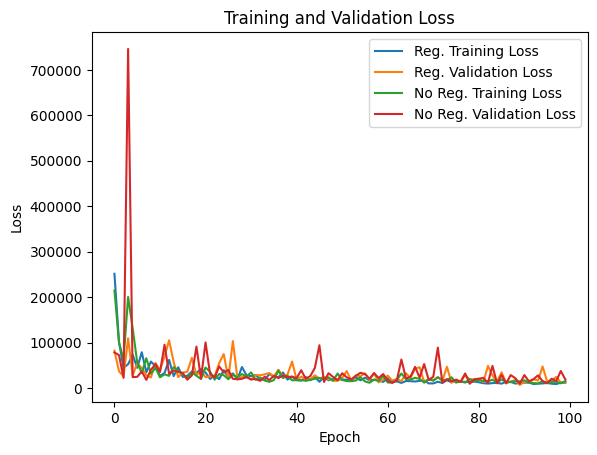

In [13]:
test_loss_reg, test_mae_reg, test_acc_reg = model_reg.evaluate(X_test_reshaped, y_test)
print('Regularized Model: Test MAE:', test_mae_reg, 'Test Accuracy:', test_acc_reg)

test_loss_no_reg, test_mae_no_reg, test_acc_no_reg = model_no_reg.evaluate(X_test_reshaped, y_test)
print('No Regularization Model: Test MAE:', test_mae_no_reg, 'Test Accuracy:', test_acc_no_reg)


plt.plot(history_reg.history['loss'], label='Reg. Training Loss')
plt.plot(history_reg.history['val_loss'], label='Reg. Validation Loss')
plt.plot(history_no_reg.history['loss'], label='No Reg. Training Loss')
plt.plot(history_no_reg.history['val_loss'], label='No Reg. Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()